In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [4]:
#load dataset
data = np.load('ORL_faces.npz')

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [5]:

x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [6]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [13]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),

    #20 is the number of outputs
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

D:\CSE299_Project\My Project\Face Recognition System (CSE299)\venv\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                492500    
Total params: 542,954
Trainable params: 542,954
Non-trainable params: 0
________________________________________________

In [9]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=150, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/150
1/1 - 28s - loss: 2.9948 - accuracy: 0.0570 - val_loss: 2.9926 - val_accuracy: 0.0833
Epoch 2/150
1/1 - 0s - loss: 2.9977 - accuracy: 0.0658 - val_loss: 3.0133 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 - 0s - loss: 3.0408 - accuracy: 0.0570 - val_loss: 3.0208 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 - 0s - loss: 2.9969 - accuracy: 0.0702 - val_loss: 3.0157 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 - 0s - loss: 2.9948 - accuracy: 0.0570 - val_loss: 3.0129 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 - 0s - loss: 2.9856 - accuracy: 0.0570 - val_loss: 3.0086 - val_accuracy: 0.0000e+00
Epoch 7/150
1/1 - 0s - loss: 2.9697 - accuracy: 0.0614 - val_loss: 3.0049 - val_accuracy: 0.0000e+00
Epoch 8/150
1/1 - 0s - loss: 3.0046 - accuracy: 0.0789 - val_loss: 2.9991 - val_accuracy: 0.0000e+00
Epoch 9/150
1/1 - 0s - loss: 2.9823 - accuracy: 0.0658 - val_loss: 2.9910 - val_accuracy: 0.0000e+00
Epoch 10/150
1/1 - 0s - loss: 2.9842 - accuracy: 0.0877 - val_loss: 2.9839 - val_accuracy: 0.0

In [10]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.3283
test acc 0.9375


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


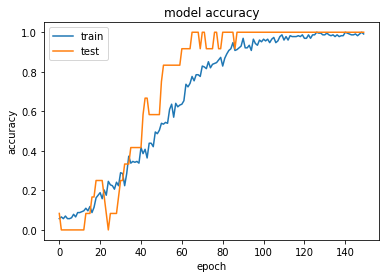

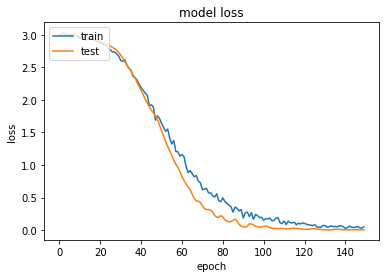

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()